<a href="https://colab.research.google.com/github/Matup98/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering

1) Instalo lo necesatio para correr el codigo

In [1]:
!pip install -U setuptools wheel
!pip install -U spacy==3.1.2
!pip install -U pip setuptools wheel
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 816 kB 6.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 5.8 MB 7.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 623 kB 41.4 MB/s 
     |████████████████████████████████| 456 kB 47.4 MB/s 
     |████████████████████████████████| 10.1 MB 36.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing 

2) Importo las librerias necesarias

In [2]:
import spacy
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import sklearn.manifold
import pandas as pd
from nltk.cluster import kmeans, cosine_distance

3) Cargo el archivo de corpus 

In [3]:
filename = "lavoztextodump.txt"
text_file = open(filename, "r")
dataset = text_file.read()
text_file.close()

4) Utilizo spacy limitando el tamaño del archivo a un valor que Google Colab pueda soportar

In [4]:
nlp = spacy.load("es_core_news_sm")
nlp.max_length = 3000000 # or even higher
doc = nlp(dataset[:3000000])

5) obtengo todas las palabras y me queda con la lematizacion de ellas

In [57]:
sents = [sent for sent in doc.sents if len(sent) > 5]

words = []
words_lemma = []
for sent in sents:
    for word in sent:
        if word.is_alpha:
            words.append(word)
            words_lemma.append(word.lemma_)
            
counts = Counter(words_lemma)

6) Defino una funcion para el diccionario

In [6]:
def featureContext(features ,context):
  for c_word in context:       
    c_lemma = c_word.lemma_ 
    key = c_lemma 
    if c_word.is_alpha and counts[c_lemma] > threshold_c: 
        if c_word.like_num: 
            key = "NUM__" 
        if not key in features: 
            features[key] = 0 
        features[key] += 1

7) Genero un diccionario

In [7]:
dicc = {} 
threshold_w = 60 
threshold_c = 30 
 
for word in words: 
    w = word.lemma_ 
    if word.like_num or counts[w] < threshold_w: 
        continue 
    if not w in dicc: 
        features = {} 
    else: 
        features = dicc[w] 
 
    pos = "POS__" + word.pos_ 
    if not pos in features: 
        features[pos] = 0 
    features[pos] += 1 
 
    dep = "DEP__" + word.dep_ 
    if not dep in features: 
        features[dep] = 0 
    features[dep] += 1 

    if not word.i == 0: 
      context_left = doc[word.i - 2: word.i] if word.i > 2 else doc[word.i - 1: word.i] 
      featureContext(features, context_left)

    if not word.i == len(doc) - 1:
      context_right = doc[word.i + 1 : word.i + 3] if word.i < len(doc) - 2 else doc[word.i + 1 : word.i + 2]
      featureContext(features, context_left)

    dicc[w] = features

{'él': {'POS__PRON': 10812, 'DEP__det': 1338, 'DEP__obj': 7718, 'no': 1382, 'mujer': 26, 'que': 4750, 'cuando': 278, 'ya': 198, 'y': 1382, 'todo': 160, 'otro': 84, 'grande': 14, 'asegurar': 28, 'en': 388, 'general': 12, 'a': 460, 'día': 78, 'así': 90, 'pedir': 38, 'levantar': 6, 'calificar': 2, 'acta': 4, 'porque': 152, 'pero': 302, 'él': 946, 'el': 2196, 'contar': 14, 'yo': 52, 'vida': 14, 'DEP__obl': 166, 'acto': 14, 'donde': 208, 'mirar': 4, 'DEP__nsubj': 202, 'DEP__expl:pass': 464, 'DEP__iobj': 558, 'NUM__': 130, 'Daniel': 2, 'estar': 24, 'con': 258, 'para': 214, 'ese': 218, 'año': 174, 'DEP__conj': 18, 'al': 94, 'diciembre': 6, 'atrás': 16, 'todavía': 24, 'Jesús': 2, 'María': 8, 'DEP__nmod': 161, 'inversión': 10, 'reforma': 6, 'Santa': 6, 'tierra': 10, 'allí': 50, 'también': 240, 'profesional': 12, 'radical': 16, 'de': 1156, 'si': 332, 'Córdoba': 100, 'provincia': 26, 'este': 244, 'público': 34, 'afectado': 2, 'ley': 14, 'Justicia': 24, 'sólo': 154, 'momento': 30, 'por': 566, 'edu

8) Genero la key_words y unifico el diccionario


In [58]:
features = []
key_words = {}
wid = 0
for d in dicc:
  key_words[d] = wid
  wid += 1
  features.append(dicc[d])
print(features)

[{'POS__PRON': 10812, 'DEP__det': 1338, 'DEP__obj': 7718, 'no': 1382, 'mujer': 26, 'que': 4750, 'cuando': 278, 'ya': 198, 'y': 1382, 'todo': 160, 'otro': 84, 'grande': 14, 'asegurar': 28, 'en': 388, 'general': 12, 'a': 460, 'día': 78, 'así': 90, 'pedir': 38, 'levantar': 6, 'calificar': 2, 'acta': 4, 'porque': 152, 'pero': 302, 'él': 946, 'el': 2196, 'contar': 14, 'yo': 52, 'vida': 14, 'DEP__obl': 166, 'acto': 14, 'donde': 208, 'mirar': 4, 'DEP__nsubj': 202, 'DEP__expl:pass': 464, 'DEP__iobj': 558, 'NUM__': 130, 'Daniel': 2, 'estar': 24, 'con': 258, 'para': 214, 'ese': 218, 'año': 174, 'DEP__conj': 18, 'al': 94, 'diciembre': 6, 'atrás': 16, 'todavía': 24, 'Jesús': 2, 'María': 8, 'DEP__nmod': 161, 'inversión': 10, 'reforma': 6, 'Santa': 6, 'tierra': 10, 'allí': 50, 'también': 240, 'profesional': 12, 'radical': 16, 'de': 1156, 'si': 332, 'Córdoba': 100, 'provincia': 26, 'este': 244, 'público': 34, 'afectado': 2, 'ley': 14, 'Justicia': 24, 'sólo': 154, 'momento': 30, 'por': 566, 'educativo

9) Vectorizo

In [9]:
v = DictVectorizer(sparse=False)
matrix = v.fit_transform(features)

matrix_normed = matrix / matrix.max(axis=0)

variances = np.square(matrix_normed).mean(axis=0) - np.square(matrix_normed.mean(axis=0))

threshold_v = 0.001
red_matrix = np.delete(matrix_normed, np.where(variances < threshold_v), axis=1)

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
matrix_dicc2d = tsne.fit_transform(red_matrix)

10) Genero la data para graficar

In [10]:
pointsspacy = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, matrix_dicc2d[key_words[word]])
            for word in key_words
        ]
    ],
    columns=["word", "x", "y"]
)

11) Grafico

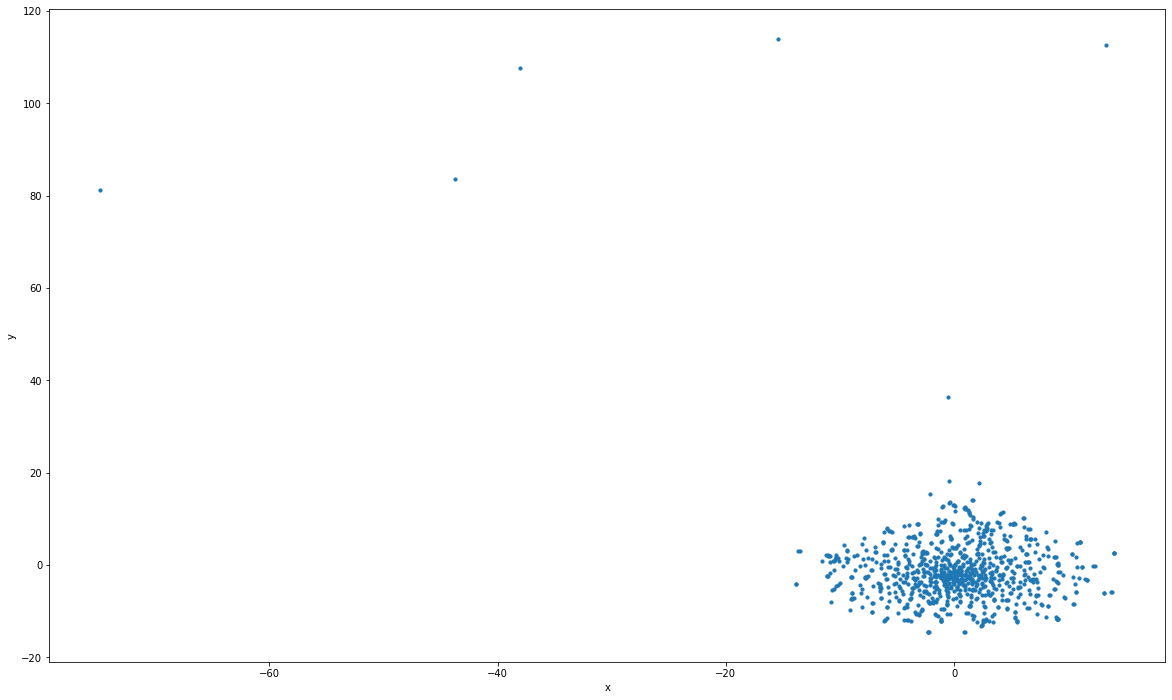

In [11]:
pointsspacy.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [ ]:
12) Creamos las funciones de los clusters: Utilizamos el algoritmo de kmeans de nltk para crear juntar en clusters. Las semillas son aleatorias. Iteramos a 3 valores.

In [12]:
def clustering(k):
    clusterer = kmeans.KMeansClusterer(k, cosine_distance, avoid_empty_clusters=True)
    clusters = clusterer.cluster(red_matrix, True)
    return clusters

In [13]:
c100 = clustering(100)
c50 = clustering(50)

13) Resultados c100

In [68]:
clusters = c100
# Stopwords
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["el"]]]
print(printer)

['él', 'que', 'a', 'el', 'ser', 'y', 'no', 'sin', 'otro', 'estar', 'en', 'de', 'del', 'sino', 'yo', 'uno', 'pero', 'ya', 'más', 'como', 'para', 'con', 'ese', 'al', 'después', 'también', 'por', 'si', 'cada', 'ahora', 'poder', 'nunca', 'este', 'desde', 'entre', 'alguno', 'su', 'mucho', 'deber', 'respecto', 'sobre', 'hasta', 'antes', 'apenas', 'atrás', 'además', 'según', 'mientras', 'entonces', 'aún', 'nadie']


In [61]:
# Dias de semana / tiempo
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["miércoles"]]]
print(printer)

['día', 'miércoles', 'martes', 'lunes', 'jueves', 'período', 'semana', 'anuncio', 'paso', 'elección', 'noviembre', 'domingo']


In [62]:
# Nombres
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Marcelo"]]]
print(printer)

['Daniel', 'Cristina', 'Juan', 'Schiaretti', 'Eduardo', 'Marcelo', 'Jorge', 'Mario']


In [56]:
# Funcionarios públicos
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["funcionario"]]]
print(printer)

['adolescente', 'jefe', 'interior', 'presidente', 'funcionario', 'dirigente', 'legislador', 'titular', 'Néstor', 'gobernador', 'senador', 'diputado', 'secretario']


14) Resultados c50

In [64]:
clusters = c50
# Stopwords
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["el"]]]
print(printer)

['él', 'que', 'a', 'el', 'ser', 'y', 'sin', 'otro', 'en', 'de', 'del', 'sino', 'tanto', 'uno', 'cuando', 'pero', 'como', 'para', 'con', 'todo', 'ese', 'al', 'través', 'también', 'por', 'contra', 'cada', 'o', 'aunque', 'ayer', 'este', 'desde', 'entre', 'porque', 'alguno', 'su', 'recién', 'mucho', 'donde', 'durante', 'sobre', 'luego', 'algo', 'varios', 'e', 'casi', 'allí', 'según', 'cerca', 'cualquiera', 'dentro', 'En', 'hacia', 'frente']


In [65]:
# Dias de semana / tiempo
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["miércoles"]]]
print(printer)

['año', 'momento', 'manera', 'día', 'toma', 'miércoles', 'debate', 'martes', 'mes', 'noche', 'discusión', 'caso', 'diciembre', 'década', 'declaración', 'viernes', 'hora', 'reunión', 'agosto', 'informe', 'diario', 'jueves', 'período', 'semana', 'escenario', 'denuncia', 'julio', 'mensaje', 'elección', 'jornada', 'noviembre', 'comunicado', 'domingo']


In [66]:
# Nombres
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["Marcelo"]]]
print(printer)

['tú', 'Daniel', 'Carlos', 'denunciar', 'tránsito', 'municipal', 'Néstor', 'Juan', 'Eduardo', 'Ricardo', 'Marcelo', 'solicitar', 'entregar']


In [67]:
# Funcionarios públicos
printer = [word for word in key_words if clusters[key_words[word]] == clusters[key_words["funcionario"]]]
print(printer)

['colegio', 'acción', 'construcción', 'De', 'funcionario', 'decisión', 'obtener', 'anuncio', 'paso', 'secretario', 'fallo', 'artículo', 'producir', 'alguien', 'resolución', 'Mario', 'concurso']
